In [83]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sn

plt.style.use('fivethirtyeight')

In [4]:
teams_df = pd.read_csv('../data/highest_earning_teams.csv')
teams = pd.read_csv('../data/highest_earning_teams.csv')
teams_df.head()

,TeamId,TeamName,TotalUSDPrize,TotalTournaments,Game,Genre
0,760,San Francisco Shock,3105000.0,7,Overwatch,First-Person Shooter
1,776,London Spitfire,1591136.5,13,Overwatch,First-Person Shooter
2,768,New York Excelsior,1572618.5,18,Overwatch,First-Person Shooter
3,773,Philadelphia Fusion,1186278.5,15,Overwatch,First-Person Shooter
4,766,Seoul Dynasty,1130000.0,6,Overwatch,First-Person Shooter


In [6]:
teams['PrizePerTournament'] = round((teams['TotalUSDPrize'] / teams['TotalTournaments']), ndigits=2)
teams.head()

,TeamId,TeamName,TotalUSDPrize,TotalTournaments,Game,Genre,PrizePerTournament
0,760,San Francisco Shock,3105000.0,7,Overwatch,First-Person Shooter,443571.43
1,776,London Spitfire,1591136.5,13,Overwatch,First-Person Shooter,122395.12
2,768,New York Excelsior,1572618.5,18,Overwatch,First-Person Shooter,87367.69
3,773,Philadelphia Fusion,1186278.5,15,Overwatch,First-Person Shooter,79085.23
4,766,Seoul Dynasty,1130000.0,6,Overwatch,First-Person Shooter,188333.33


In [71]:
team_colors_genre = ['firebrick', 'darkorange', 'forestgreen', 'dodgerblue', 'darkblue']

In [72]:
team_color_conditions = [
    (teams['Genre'] == 'Strategy'),
    (teams['Genre'] == 'Collectible Card Game'),
    (teams['Genre'] == 'First-Person Shooter'),
    (teams['Genre'] == 'Battle Royale'),
    (teams['Genre'] == 'Multiplayer Online Battle Arena')
]

In [73]:
teams['GenreColor'] = np.select(team_color_conditions, team_colors_genre)
teams.tail()

,TeamId,TeamName,TotalUSDPrize,TotalTournaments,Game,Genre,PrizePerTournament,GenreColor
923,24781,Rex Regum Qeon,6286.8,2,Arena of Valor,Multiplayer Online Battle Arena,3143.4,darkblue
924,261,Alliance,4000.0,1,Arena of Valor,Multiplayer Online Battle Arena,4000.0,darkblue
925,713,Marines Esports,3429.6,1,Arena of Valor,Multiplayer Online Battle Arena,3429.6,darkblue
926,608,British National Team,2500.0,1,Arena of Valor,Multiplayer Online Battle Arena,2500.0,darkblue
927,584,Swedish National Team,2500.0,1,Arena of Valor,Multiplayer Online Battle Arena,2500.0,darkblue


In [47]:
# Showing games, need to get number of players on each team
teams_grouped_by_tournament_count = teams.groupby('Game')['TotalTournaments'].sum()
teams_grouped_by_tournament_count = teams_grouped_by_tournament_count.sort_values()
teams_grouped_by_tournament_count

Game
Arena of Valor                        142
Hearthstone                           662
Overwatch                             772
PUBG                                  828
Fortnite                             1229
Heroes of the Storm                  1663
League of Legends                    2515
Dota 2                               2931
Counter-Strike: Global Offensive     5996
Starcraft II                        12676
Name: TotalTournaments, dtype: int64

In [48]:
colors_by_tournament_count = ['firebrick', 'forestgreen', 'darkblue', 'darkblue', 'darkblue', 'dodgerblue', 'dodgerblue', 'forestgreen', 'darkorange', 'darkblue'] 

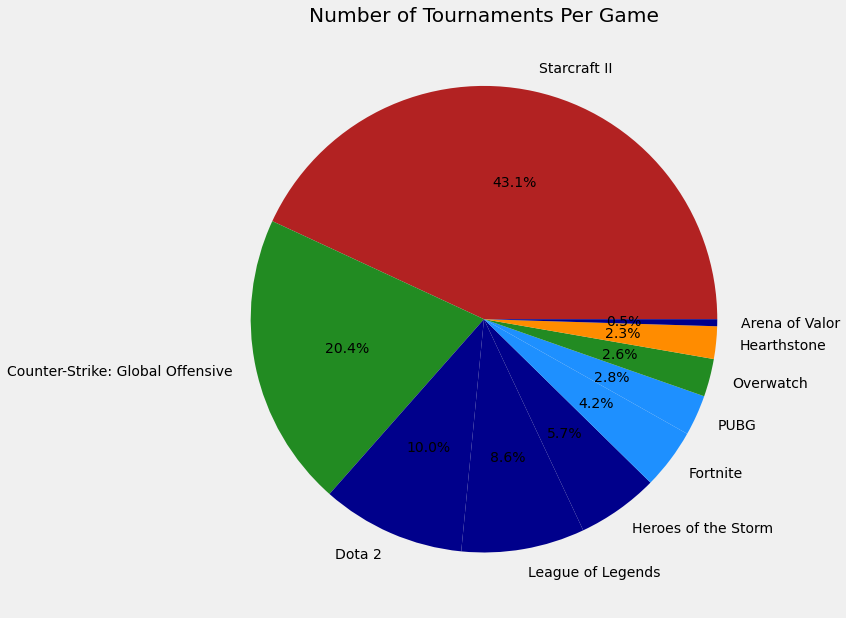

In [49]:
# Totals
ax = teams_grouped_by_tournament_count.sort_values(ascending=False).plot.pie(autopct='%1.1f%%', colors=colors_by_tournament_count)

ax.set_title('Number of Tournaments Per Game')
ax.set_ylabel('')

fig = ax.figure
fig.set_size_inches(18,10)
#fig.savefig('../images/pie_number_of_tournaments_share.png')

In [51]:
# Showing games, need to get number of players on each team
teams_grouped_by_game = teams.groupby('Game')['TotalUSDPrize'].sum()
teams_grouped_by_game = teams_grouped_by_game.sort_values()
teams_grouped_by_game

Game
Arena of Valor                      9.969149e+06
Heroes of the Storm                 1.071052e+07
Hearthstone                         1.086453e+07
PUBG                                1.671500e+07
Overwatch                           2.046527e+07
Starcraft II                        2.785615e+07
Fortnite                            3.466133e+07
League of Legends                   6.466556e+07
Counter-Strike: Global Offensive    8.485393e+07
Dota 2                              2.202828e+08
Name: TotalUSDPrize, dtype: float64

In [54]:
colors_by_game = ['darkblue', 'forestgreen', 'darkblue', 'dodgerblue', 'firebrick', 'forestgreen', 'dodgerblue', 'darkorange', 'darkblue', 'darkblue'] 

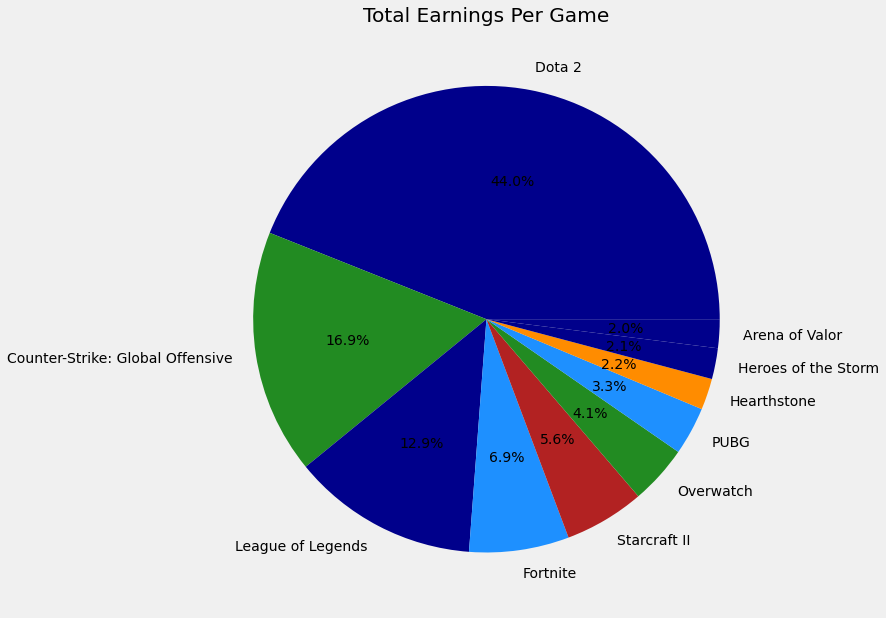

In [56]:
# Totals
ax = teams_grouped_by_game.sort_values(ascending=False).plot.pie(autopct='%1.1f%%', colors=colors_by_game)

ax.set_title('Total Earnings Per Game')
ax.set_ylabel('')

fig = ax.figure
fig.set_size_inches(18,10)
#fig.savefig('../images/average_team_prize_per_game.png')

In [91]:
df_teams = teams[['TotalUSDPrize', 'TotalTournaments', 'Game', 'Genre', 'PrizePerTournament', 'GenreColor']]
#df_teams.head()

In [92]:
moba = df_teams[df_teams['Genre'] == 'Multiplayer Online Battle Arena']
battle_royale = df_teams[df_teams['Genre'] == 'Battle Royale']
fps = df_teams[df_teams['Genre'] == 'First-Person Shooter']
card_game = df_teams[df_teams['Genre'] == 'Collectible Card Game']
strategy = df_teams[df_teams['Genre'] == 'Strategy']

# Bootstraping by Prize per tournament for each genre

## Bootstrapping Battle Royales

In [171]:
battle_royale_corr_matrix = battle_royale.corr()
#sn.heatmap(battle_royale_corr_matrix, annot=True)
#plt.show()
battle_royale.describe()

,TotalUSDPrize,TotalTournaments,PrizePerTournament
count,2.000000e+02,200.000000,200.000000
mean,2.568817e+05,10.285000,23767.907050
std,5.684191e+05,13.023897,37145.047033
min,1.200000e+03,1.000000,641.670000
25%,2.956598e+04,3.000000,5780.732500
50%,6.677191e+04,7.000000,11996.805000
75%,1.779086e+05,12.000000,25382.500000
max,3.708150e+06,105.000000,262500.000000


In [192]:
bootstrap_br_sample_means = pd.DataFrame({'mean_avg_prize': [battle_royale.sample(10000, replace=True).PrizePerTournament.mean() for i in range(10000)]})

In [193]:
bottom_br_bootstrap_mean = bootstrap_br_sample_means.mean_avg_prize.quantile(0.025)
top_br_bootstrap_mean = bootstrap_br_sample_means.mean_avg_prize.quantile(0.975)

bootstrap_br_sample_means.mean_avg_prize.quantile(0.025), bootstrap_br_sample_means.mean_avg_prize.quantile(0.975)

(23046.32075060011, 24508.121003900145)

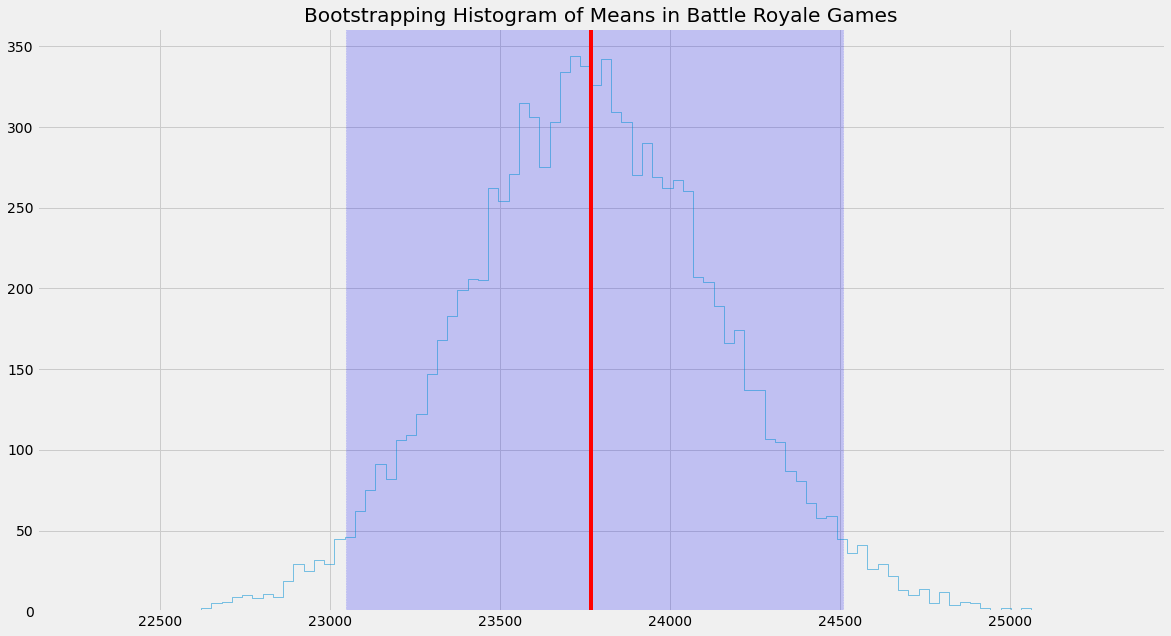

In [194]:
bootstrap_br_sample_means.mean_avg_prize.hist(histtype='step', bins=100, figsize=(18,10))
plt.axvline(battle_royale.PrizePerTournament.mean(), color = 'red')
plt.axvspan(bottom_br_bootstrap_mean, top_br_bootstrap_mean, linestyle='--', color='blue', alpha=0.2)
plt.title('Bootstrapping Histogram of Means in Battle Royale Games')
plt.plot()
plt.savefig('../images/bootstrapping_br_hist.png')

In [195]:
bootstrap_br_mean = bootstrap_br_sample_means.mean()
bootstrap_br_mean

mean_avg_prize    23768.260614
dtype: float64

## Bootstrapping MOBA Games

In [176]:
moba_corr_matrix = moba.corr()
#sn.heatmap(moba_corr_matrix, annot=True)
#plt.show()

In [177]:
bootstrap_moba_sample_means = pd.DataFrame({'mean_avg_prize': [moba.sample(10000, replace=True).PrizePerTournament.mean() for i in range(10000)]})

In [178]:
bottom_moba_bootstrap_mean = bootstrap_moba_sample_means.mean_avg_prize.quantile(0.025)
top_moba_bootstrap_mean = bootstrap_moba_sample_means.mean_avg_prize.quantile(0.975)

bootstrap_moba_sample_means.mean_avg_prize.quantile(0.025), bootstrap_moba_sample_means.mean_avg_prize.quantile(0.975)

(32813.793162075126, 35269.20831187516)

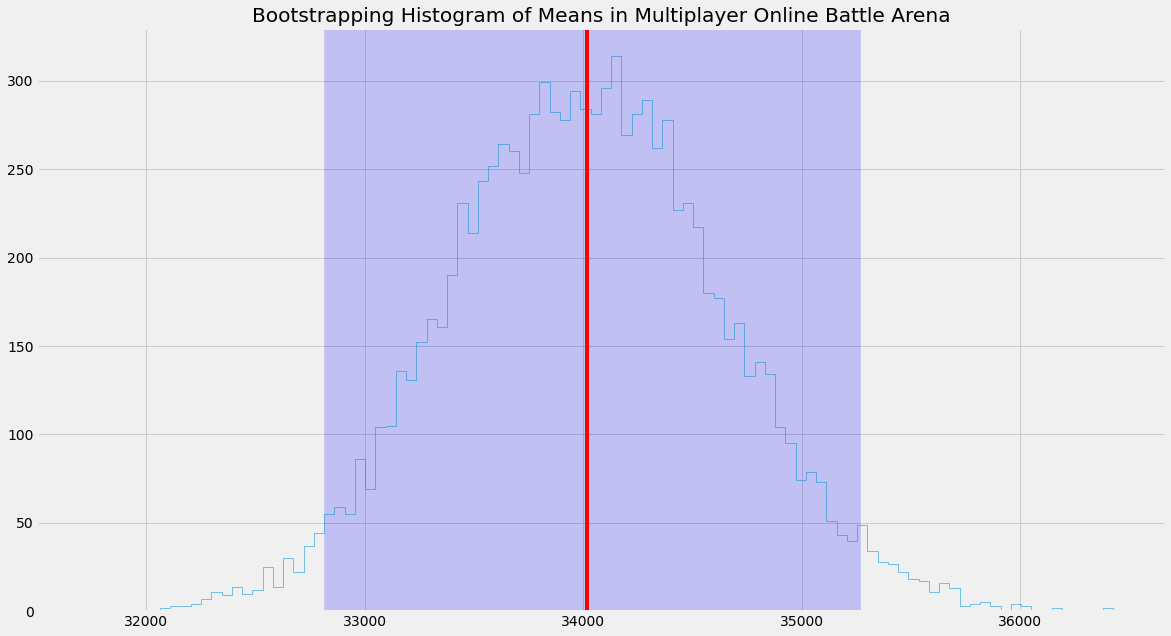

In [179]:
bootstrap_moba_sample_means.mean_avg_prize.hist(histtype='step', bins=100, figsize=(18,10))
plt.axvline(moba.PrizePerTournament.mean(), color = 'red')
plt.axvspan(bottom_moba_bootstrap_mean, top_moba_bootstrap_mean, linestyle='--', color='blue', alpha=0.2)
plt.title('Bootstrapping Histogram of Means in Multiplayer Online Battle Arena')
plt.plot()
plt.savefig('../images/bootstrapping_moba_hist.png')

In [180]:
bootstrap_moba_mean = bootstrap_moba_sample_means.mean()
bootstrap_moba_mean

mean_avg_prize    34012.851464
dtype: float64

## Bootstrapping FPS Games

In [181]:
fps_corr_matrix = fps.corr()
#sn.heatmap(fps_corr_matrix, annot=True)
#plt.savefig('../images/corr_matrix_fps.png')
#plt.show()
#fps.sort_values(ascending=False, by='PrizePerTournament')

In [148]:
bootstrap_fps_sample_means = pd.DataFrame({'mean_avg_prize': [fps.sample(10000, replace=True).PrizePerTournament.mean() for i in range(10000)]})

In [150]:
bottom_fps_bootstrap_mean = bootstrap_fps_sample_means.mean_avg_prize.quantile(0.025)
top_fps_bootstrap_mean = bootstrap_fps_sample_means.mean_avg_prize.quantile(0.975)

bootstrap_fps_sample_means.mean_avg_prize.quantile(0.025), bootstrap_fps_sample_means.mean_avg_prize.quantile(0.975)

(20978.52896895013, 22732.24620160019)

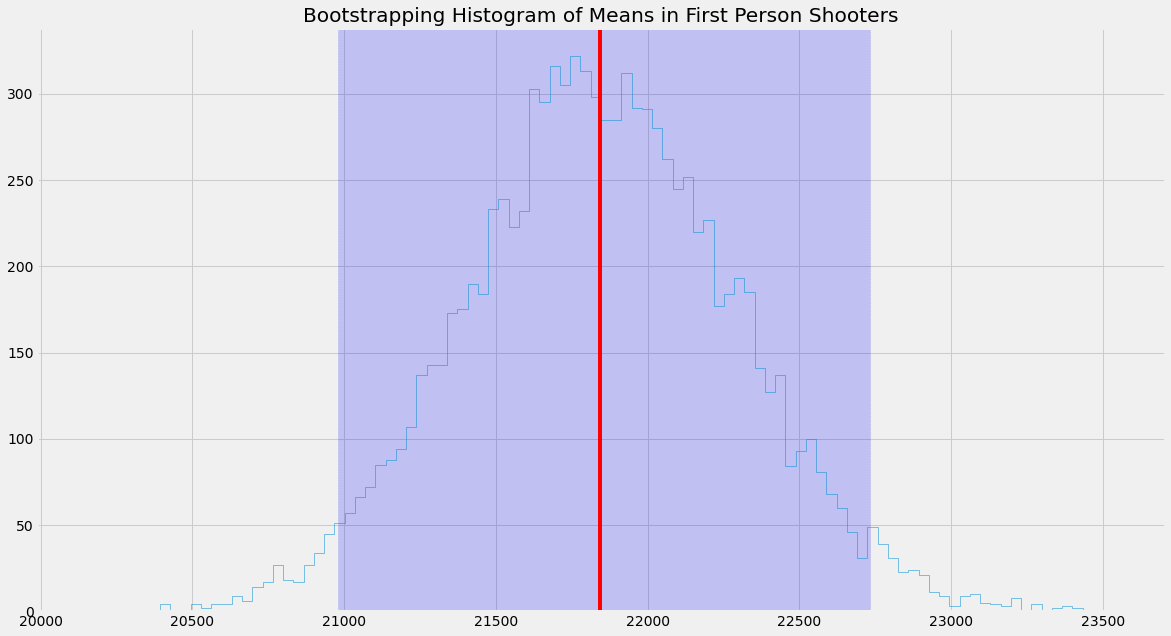

In [161]:
bootstrap_fps_sample_means.mean_avg_prize.hist(histtype='step', bins=100, figsize=(18,10))
plt.axvline(fps.PrizePerTournament.mean(), color = 'red')
plt.axvspan(bottom_fps_bootstrap_mean, top_fps_bootstrap_mean, linestyle='--', color='blue', alpha=0.2)
plt.title('Bootstrapping Histogram of Means in First Person Shooters')
plt.plot()
plt.savefig('../images/bootstrapping_fps_hist.png')

In [185]:
bootstrap_fps_mean = bootstrap_fps_sample_means.mean()
bootstrap_fps_mean

mean_avg_prize    21843.931327
dtype: float64

## Bootstrapping Card Games

In [125]:
card_game_corr_matrix = card_game.corr()
#sn.heatmap(card_game_corr_matrix, annot=True)
#plt.show()
card_game.describe()

,TotalUSDPrize,TotalTournaments,PrizePerTournament
count,8.000000e+01,80.000000,80.000000
mean,1.358066e+05,8.275000,12301.418000
std,2.824002e+05,11.001697,24021.086258
min,1.750000e+02,1.000000,100.000000
25%,1.900000e+03,1.000000,1500.000000
50%,9.859875e+03,4.000000,3366.725000
75%,1.305827e+05,9.000000,12573.347500
max,1.656840e+06,44.000000,175000.000000


In [182]:
bootstrap_cardgame_sample_means = pd.DataFrame({'mean_avg_prize': [card_game.sample(10000, replace=True).PrizePerTournament.mean() for i in range(10000)]})

In [183]:
bottom_cardgame_bootstrap_mean = bootstrap_cardgame_sample_means.mean_avg_prize.quantile(0.025)
top_cardgame_bootstrap_mean = bootstrap_cardgame_sample_means.mean_avg_prize.quantile(0.975)

bootstrap_cardgame_sample_means.mean_avg_prize.quantile(0.025), bootstrap_cardgame_sample_means.mean_avg_prize.quantile(0.975)

(11848.606524274906, 12777.231628974907)

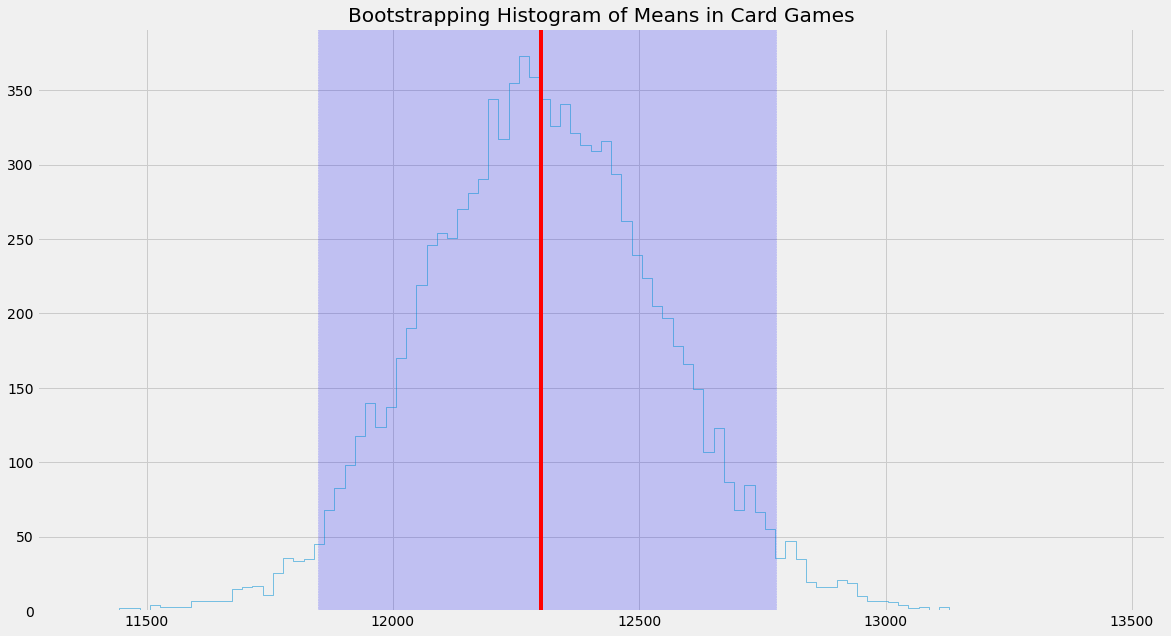

In [184]:
bootstrap_cardgame_sample_means.mean_avg_prize.hist(histtype='step', bins=100, figsize=(18,10))
plt.axvline(card_game.PrizePerTournament.mean(), color = 'red')
plt.axvspan(bottom_cardgame_bootstrap_mean, top_cardgame_bootstrap_mean, linestyle='--', color='blue', alpha=0.2)
plt.title('Bootstrapping Histogram of Means in Card Games')
plt.plot()
plt.savefig('../images/bootstrapping_cardgames_hist.png')

In [186]:
bootstrap_cardgame_mean = bootstrap_cardgame_sample_means.mean()
bootstrap_cardgame_mean

mean_avg_prize    12303.156949
dtype: float64

## Bootstrapping Strategy Games

In [187]:
strategy_corr_matrix = strategy.corr()
#sn.heatmap(strategy_corr_matrix, annot=True)
#plt.savefig('../images/corr_matrix_strategy.png')
#plt.show()
#strategy.describe()

In [188]:
bootstrap_strategy_sample_means = pd.DataFrame({'mean_avg_prize': [strategy.sample(10000, replace=True).PrizePerTournament.mean() for i in range(10000)]})

In [189]:
bottom_strategy_bootstrap_mean = bootstrap_strategy_sample_means.mean_avg_prize.quantile(0.025)
top_strategy_bootstrap_mean = bootstrap_strategy_sample_means.mean_avg_prize.quantile(0.975)

bootstrap_strategy_sample_means.mean_avg_prize.quantile(0.025), bootstrap_strategy_sample_means.mean_avg_prize.quantile(0.975)

(4101.248273199975, 4773.089377199998)

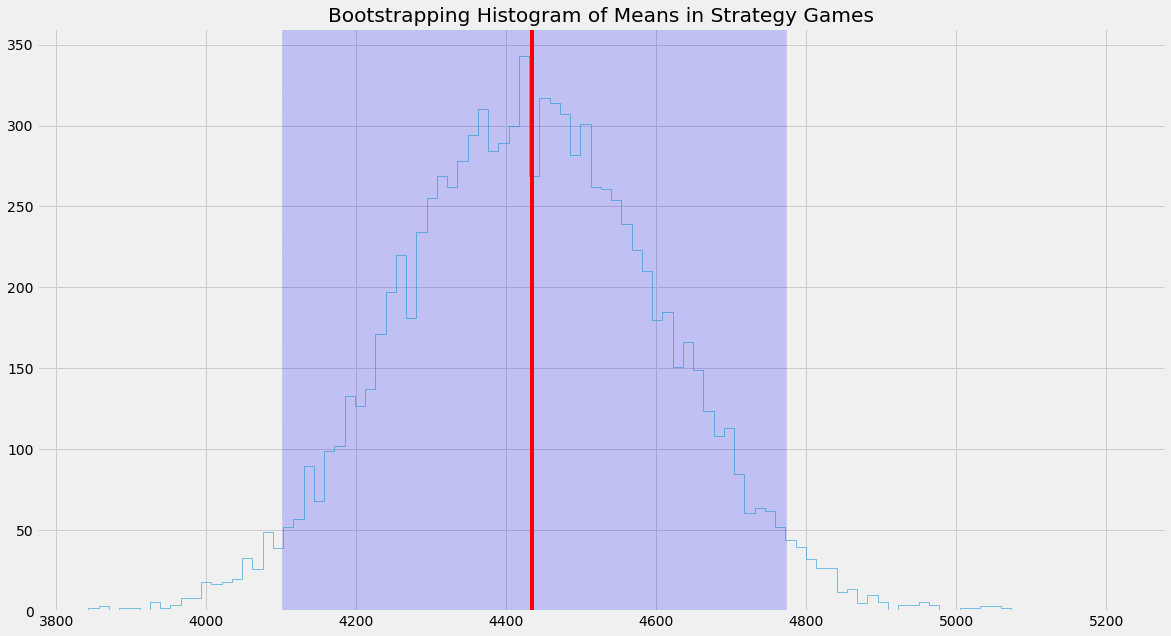

In [190]:
bootstrap_strategy_sample_means.mean_avg_prize.hist(histtype='step', bins=100, figsize=(18,10))
plt.axvline(strategy.PrizePerTournament.mean(), color = 'red')
plt.axvspan(bottom_strategy_bootstrap_mean, top_strategy_bootstrap_mean, linestyle='--', color='blue', alpha=0.2)
plt.title('Bootstrapping Histogram of Means in Strategy Games')
plt.plot()
plt.savefig('../images/bootstrapping_strategy_hist.png')

In [191]:
bootstrap_strategy_mean = bootstrap_strategy_sample_means.mean()
bootstrap_strategy_mean

mean_avg_prize    4432.974428
dtype: float64

## All Bootstraping Means Together

In [206]:
n1 = '\n'

f'Battle Royale bootstrapped mean: {bootstrap_br_mean}{n1} Card Game bootstrapped mean: {bootstrap_cardgame_mean}{n1} \First-Person Shooters bootstrapped mean: {bootstrap_fps_mean}{n1}Multiplayer Online Battle Arena bootstrapped mean: {bootstrap_moba_mean}{n1}Strategy bootstrapped mean: {bootstrap_strategy_mean}'

'Battle Royale bootstrapped mean: mean_avg_prize    23768.260614\ndtype: float64\n Card Game bootstrapped mean: mean_avg_prize    12303.156949\ndtype: float64\n \\First-Person Shooters bootstrapped mean: mean_avg_prize    21843.931327\ndtype: float64\nMultiplayer Online Battle Arena bootstrapped mean: mean_avg_prize    34012.851464\ndtype: float64\nStrategy bootstrapped mean: mean_avg_prize    4432.974428\ndtype: float64'